In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [163]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [826]:
samsung_new = pd.read_csv('samsung_new.csv')
celltrion_new = pd.read_csv('celltrion_new.csv')
kakao_new = pd.read_csv('kakao_new.csv')
naver_new = pd.read_csv('naver_new.csv')
skhynix_new = pd.read_csv('skhynix_new.csv')

In [827]:
samsung_new.columns = ['Date','G_Val','F_Val','F_total','F_percen']
samsung_new = samsung_new.loc[3068:517:-1,:,]
samsung_new.index = samsung_new['Date']
samsung_new.drop(columns=['Date'],inplace=True)
celltrion_new.columns = ['Date','G_Val','F_Val','F_total','F_percen']
celltrion_new = celltrion_new.loc[3068:517:-1,:,]
celltrion_new.index = celltrion_new['Date']
celltrion_new.drop(columns=['Date'],inplace=True)
kakao_new.columns = ['Date','G_Val','F_Val','F_total','F_percen']
kakao_new = kakao_new.loc[3068:517:-1,:,]
kakao_new.index = kakao_new['Date']
kakao_new.drop(columns=['Date'],inplace=True)
naver_new.columns = ['Date','G_Val','F_Val','F_total','F_percen']
naver_new = naver_new.loc[3068:517:-1,:,]
naver_new.index = naver_new['Date']
naver_new.drop(columns=['Date'],inplace=True)
skhynix_new.columns = ['Date','G_Val','F_Val','F_total','F_percen']
skhynix_new = skhynix_new.loc[3068:517:-1,:,]
skhynix_new.index = skhynix_new['Date']
skhynix_new.drop(columns=['Date'],inplace=True)

In [833]:
kospi_train = fdr.DataReader('KS11','2010-01-01','2020-04-29') # kospi (2549)
celltrion_train = fdr.DataReader('068270','2010-01-01','2020-04-29') # celltrion (2548)
kakao_train = fdr.DataReader('035720','2010-01-01','2020-04-29') # kakao (2548)
naver_train = fdr.DataReader('035420','2010-01-01','2020-04-29') # naver (2548)
samsung_train = fdr.DataReader('005930','2010-01-01','2020-04-29') # samsung (2548)
skhynix_train = fdr.DataReader('000660','2010-01-01','2020-04-29') # skhynix (2548)
us_3MT_train = fdr.DataReader('US3MT=X','2010-01-01','2020-04-29') # 미국채 3개월 금리 (3086)
us_2YT_train = fdr.DataReader('US2YT=X','2010-01-01','2020-04-29') # 미국채 2년 금리 (3070)
us_10YT_train = fdr.DataReader('US10YT=X','2010-01-01','2020-04-29') # 미국채 10년 금리 (3013)
kr_2YT_train = fdr.DataReader('KR10YT=RR','2010-01-01','2020-04-29') # 한국채 2년 금리 (3062)
kr_10YT_train = fdr.DataReader('KR10YT=RR','2010-01-01','2020-04-29') # 한국채 10년 금리 (3062)
wti_train = fdr.DataReader('CL','2010-01-01','2020-04-29') # wti 유가 선물 (2598)
gas_train = fdr.DataReader('NG','2010-01-01','2020-04-29') # 천연 가스 선물 (2595)
gold_train = fdr.DataReader('ZG','2010-01-01','2020-04-29') # 금 선물 (2544)
copper_train = fdr.DataReader('HG','2010-01-01','2020-04-29') # 구리 선물 (2538)
usd_index_train = fdr.DataReader('DX','2010-01-01','2020-04-29') # 달러 지수 선물 (2662)
usd_krw_train = fdr.DataReader('USD/KRW','2010-01-01','2020-04-29') # 달러/원화 환율 (2694)
usd_jpy_train = fdr.DataReader('USD/JPY','2010-01-01','2020-04-29') # 달러/엔화 환율 (2694)
usd_cny_train = fdr.DataReader('USD/CNY','2010-01-01','2020-04-29') # 달러/위안화 환율 (2694)
dow_train = fdr.DataReader('DJI','2010-01-01','2020-04-29') # 다우 존스 지수 (2598)
snp_train = fdr.DataReader('US500','2010-01-01','2020-04-29') # snp 500 지수 (2598)
nasdaq_train = fdr.DataReader('IXIC','2010-01-01','2020-04-29') # nasdaq 지수 (2598)
hk_train = fdr.DataReader('HK50','2010-01-01','2020-04-29') # 항셍 지수 (2147)
csi_train = fdr.DataReader('csi300','2010-01-01','2020-04-29') # csi300 지수 (2511)

In [836]:
kospi_test = fdr.DataReader('KS11','2020-05-04','2020-09-30') # kospi (2549)
celltrion_test = fdr.DataReader('068270','2020-05-04','2020-09-30') # celltrion (2548)
kakao_test = fdr.DataReader('035720','2020-05-04','2020-09-30') # kakao (2548)
naver_test = fdr.DataReader('035420','2020-05-04','2020-09-30') # naver (2548)
samsung_test = fdr.DataReader('005930','2020-05-04','2020-09-30') # samsung (2548)
skhynix_test = fdr.DataReader('000660','2020-05-04','2020-09-30') # skhynix (2548)
###------------------------------------------------------------------------------------------###
us_3MT_test = fdr.DataReader('US3MT=X','2020-05-04','2020-09-30') # 미국채 3개월 금리 (3086)
us_2YT_test = fdr.DataReader('US2YT=X','2020-05-04','2020-09-30') # 미국채 2년 금리 (3070)
us_10YT_test = fdr.DataReader('US10YT=X','2020-05-04','2020-09-30') # 미국채 10년 금리 (3013)
kr_2YT_test = fdr.DataReader('KR10YT=RR','2020-05-04','2020-09-30') # 한국채 2년 금리 (3062)
kr_10YT_test = fdr.DataReader('KR10YT=RR','2020-05-04','2020-09-30') # 한국채 10년 금리 (3062)
wti_test = fdr.DataReader('CL','2020-05-04','2020-09-30') # wti 유가 선물 (2598)
gas_test = fdr.DataReader('NG','2020-05-04','2020-09-30') # 천연 가스 선물 (2595)
gold_test = fdr.DataReader('ZG','2020-05-04','2020-09-30') # 금 선물 (2544)
copper_test = fdr.DataReader('HG','2020-05-04','2020-09-30') # 구리 선물 (2538)
usd_index_test = fdr.DataReader('DX','2020-05-04','2020-09-30') # 달러 지수 선물 (2662)
usd_krw_test = fdr.DataReader('USD/KRW','2020-05-04','2020-09-30') # 달러/원화 환율 (2694)
usd_jpy_test = fdr.DataReader('USD/JPY','2020-05-04','2020-09-30') # 달러/엔화 환율 (2694)
usd_cny_test = fdr.DataReader('USD/CNY','2020-05-04','2020-09-30') # 달러/위안화 환율 (2694)
dow_test = fdr.DataReader('DJI','2020-05-04','2020-09-30') # 다우 존스 지수 (2598)
snp_test = fdr.DataReader('US500','2020-05-04','2020-09-30') # snp 500 지수 (2598)
nasdaq_test = fdr.DataReader('IXIC','2020-05-04','2020-09-30') # nasdaq 지수 (2598)
hk_test = fdr.DataReader('HK50','2020-05-04','2020-09-30') # 항셍 지수
csi_test = fdr.DataReader('csi300','2020-05-04','2020-09-30') # csi300

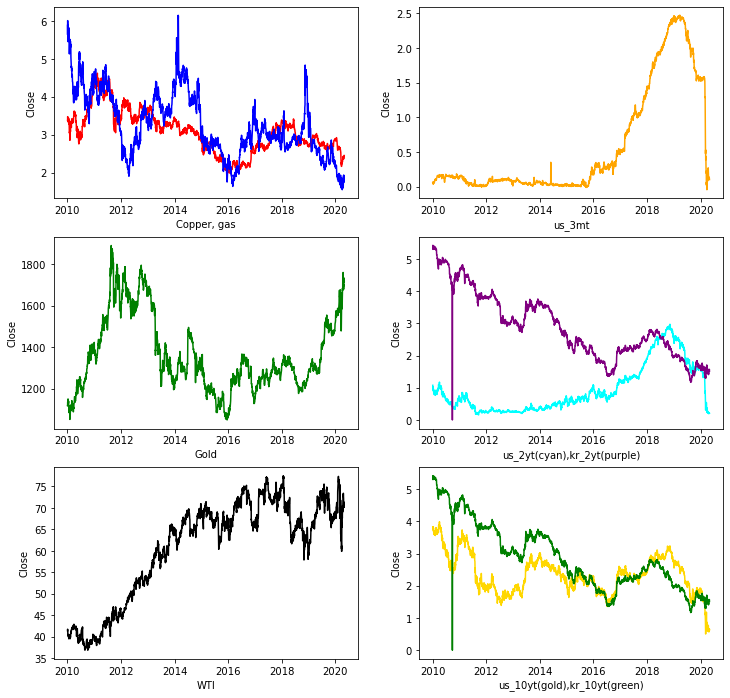

In [787]:
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.lineplot(x=copper_train.index,y = copper_train['Close'], color='r')
sns.lineplot(x=gas_train.index,y = gas_train['Close'], color = 'b')
plt.xlabel('Copper, gas')
plt.subplot(323)
sns.lineplot(x=gold_train.index,y = gold_train['Close'], color = 'g')
plt.xlabel('Gold')
plt.subplot(325)
sns.lineplot(x=wti_train.index,y = wti_train['Close'], color = 'black')
plt.xlabel('WTI')
plt.subplot(322)
sns.lineplot(x=us_3MT_train.index,y = us_3MT_train['Close'], color = 'orange')
plt.xlabel('us_3mt')
plt.subplot(324)
sns.lineplot(x=us_2YT_train.index,y = us_2YT_train['Close'], color = 'cyan')
sns.lineplot(x=kr_2YT_train.index,y = kr_2YT_train['Close'], color = 'purple')
plt.xlabel('us_2yt(cyan),kr_2yt(purple)')
plt.subplot(326)
sns.lineplot(x=us_10YT_train.index,y = us_10YT_train['Close'], color = 'gold')
sns.lineplot(x=kr_10YT_train.index,y = kr_10YT_train['Close'], color = 'green')
plt.xlabel('us_10yt(gold),kr_10yt(green)')
plt.show()

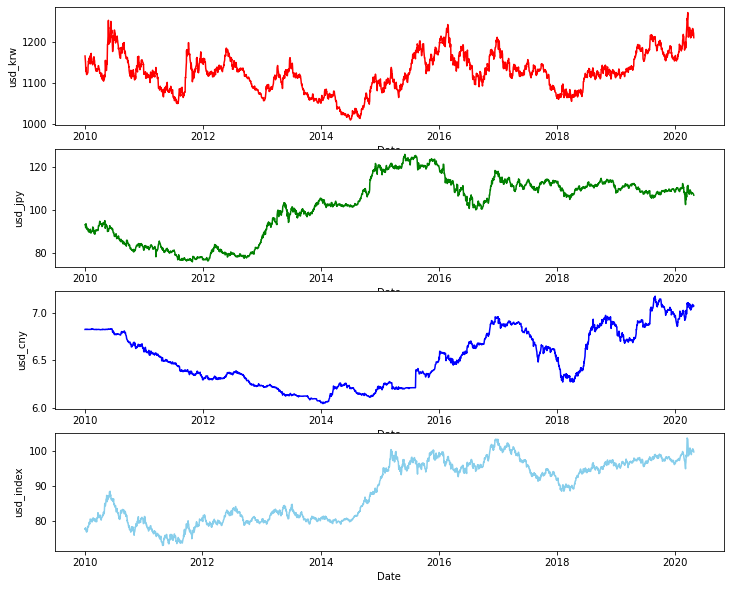

In [542]:
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.ylabel('usd_krw')
sns.lineplot(x=usd_krw_train.index,y = usd_krw_train['Close'], color='r')
plt.subplot(412)
plt.ylabel('usd_jpy')
sns.lineplot(x=usd_jpy_train.index,y = usd_jpy_train['Close'], color = 'g')
plt.subplot(413)
plt.ylabel('usd_cny')
sns.lineplot(x=usd_cny_train.index,y = usd_cny_train['Close'], color = 'b')
plt.subplot(414)
plt.ylabel('usd_index')
sns.lineplot(x=usd_index_train.index,y = usd_index_train['Close'], color = 'skyblue')
plt.show()

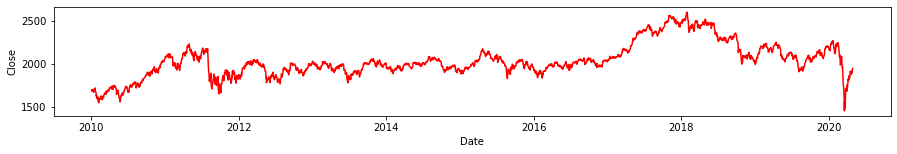

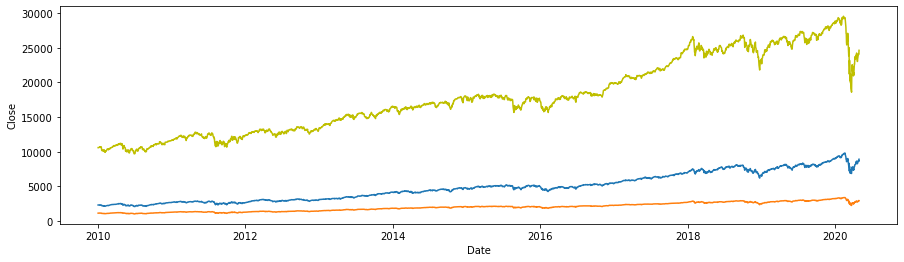

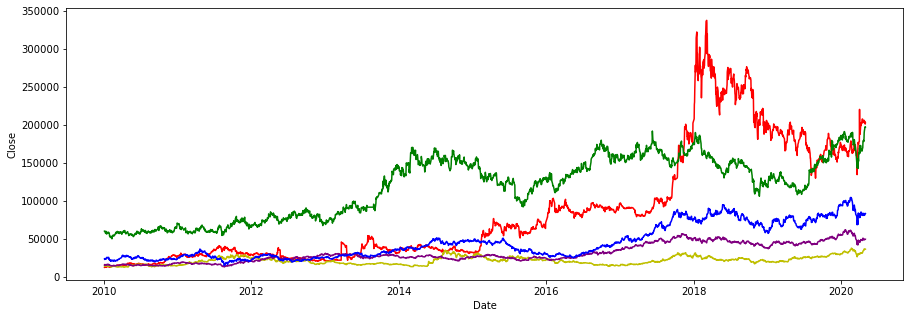

In [786]:
plt.figure(figsize=(15,2))
sns.lineplot(x = kospi_train.index, y = kospi_train.Close, color= 'r')
plt.show()
plt.figure(figsize=(15,4))
sns.lineplot(x = dow_train.index, y = dow_train.Close, color = 'y')
sns.lineplot(x = nasdaq_train.index, y = nasdaq_train.Close)
sns.lineplot(x = snp_train.index, y = snp_train.Close)
plt.show()
plt.figure(figsize=(15,5))
sns.lineplot(x = celltrion_train.index, y = celltrion_train.Close,color='r')
sns.lineplot(x = kakao_train.index, y = kakao_train.Close, color='y')
sns.lineplot(x = samsung_train.index, y = samsung_train.Close,color='purple')
sns.lineplot(x = naver_train.index, y = naver_train.Close, color='g')
sns.lineplot(x = skhynix_train.index, y = skhynix_train.Close,color='b')
plt.show()

In [834]:
kospi_t = pd.merge(kospi_train['Close'],dow_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,snp_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,csi_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,hk_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_krw_train.Close,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_index_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,usd_cny_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,gold_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,wti_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,copper_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,gas_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,kr_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,us_3MT_train.Open,left_index=True,right_index=True,how='left')
kospi_t = pd.merge(kospi_t,us_10YT_train.Open,left_index=True,right_index=True,how='left')
kospi_t.columns = ['Target','Dow','Snp','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']
kospi_t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2549 entries, 2010-01-04 to 2020-04-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2549 non-null   float64
 1   Dow        2471 non-null   float64
 2   Snp        2471 non-null   float64
 3   Csi        2427 non-null   float64
 4   Hk         2068 non-null   float64
 5   Usd_krw    2549 non-null   float64
 6   Usd_index  2532 non-null   float64
 7   Usd_cny    2549 non-null   float64
 8   Gold       2420 non-null   float64
 9   Wti        2471 non-null   float64
 10  Copper     2409 non-null   float64
 11  Gas        2469 non-null   float64
 12  Kr_10YT    2548 non-null   float64
 13  Us_3MT     2531 non-null   float64
 14  Us_10YT    2528 non-null   float64
dtypes: float64(15)
memory usage: 383.2 KB


/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/3518563252.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,hk_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/3518563252.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,usd_cny_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/3518563252.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_t = pd.merge(kospi_t,wti_train.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45

In [837]:
kospi_t = kospi_t.drop(kospi_t[kospi_t['Dow'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Usd_index'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Usd_cny'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Gold'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Kr_10YT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Copper'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Wti'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Gas'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Us_3MT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Us_10YT'].isnull()].index)
kospi_t = kospi_t.drop(kospi_t[kospi_t['Csi'].isnull()].index)
kospi_t_hk = kospi_t.drop(kospi_t[kospi_t['Hk'].isnull()].index)
kospi_t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2010-01-04 to 2020-04-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2227 non-null   float64
 1   Dow        2227 non-null   float64
 2   Snp        2227 non-null   float64
 3   Csi        2227 non-null   float64
 4   Hk         1841 non-null   float64
 5   Usd_krw    2227 non-null   float64
 6   Usd_index  2227 non-null   float64
 7   Usd_cny    2227 non-null   float64
 8   Gold       2227 non-null   float64
 9   Wti        2227 non-null   float64
 10  Copper     2227 non-null   float64
 11  Gas        2227 non-null   float64
 12  Kr_10YT    2227 non-null   float64
 13  Us_3MT     2227 non-null   float64
 14  Us_10YT    2227 non-null   float64
dtypes: float64(15)
memory usage: 342.9 KB


In [840]:
kospi_tst = pd.merge(kospi_test['Close'],dow_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,snp_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,csi_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,hk_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_krw_test.Close,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_index_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,usd_cny_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,gold_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,wti_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,copper_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,gas_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,kr_10YT_test.Close,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,us_3MT_test.Open,left_index=True,right_index=True,how='left')
kospi_tst = pd.merge(kospi_tst,us_10YT_test.Open,left_index=True,right_index=True,how='left')
kospi_tst.columns = ['Target','Dow','Snp','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']
kospi_tst.fillna(method='ffill',inplace=True)
kospi_tst.fillna(method='bfill',inplace=True)
kospi_tst.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-05-04 to 2020-09-29
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     105 non-null    float64
 1   Dow        105 non-null    float64
 2   Snp        105 non-null    float64
 3   Csi        105 non-null    float64
 4   Hk         105 non-null    float64
 5   Usd_krw    105 non-null    float64
 6   Usd_index  105 non-null    float64
 7   Usd_cny    105 non-null    float64
 8   Gold       105 non-null    float64
 9   Wti        105 non-null    float64
 10  Copper     105 non-null    float64
 11  Gas        105 non-null    float64
 12  Kr_10YT    105 non-null    float64
 13  Us_3MT     105 non-null    float64
 14  Us_10YT    105 non-null    float64
dtypes: float64(15)
memory usage: 17.2 KB


/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/2509220859.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,hk_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/2509220859.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,usd_cny_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_1491/2509220859.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_tst = pd.merge(kospi_tst,wti_test.Open,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2

<AxesSubplot:>

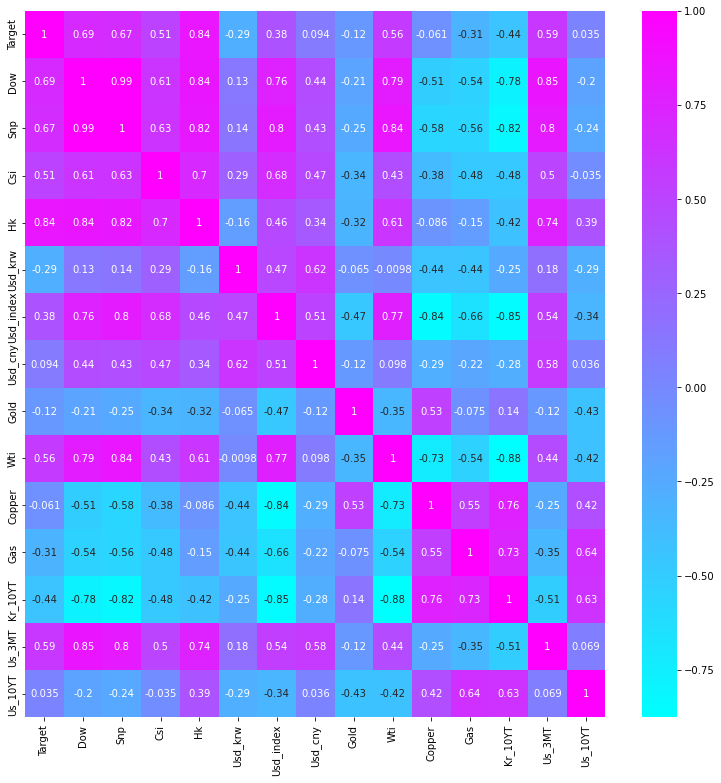

In [841]:
plt.figure(figsize=(13,13))
sns.heatmap(kospi_t.corr(),annot=True, cmap='cool')

In [754]:
kospi_t.Usd_index = kospi_t.Usd_index*10
kospi_t.Usd_cny =  kospi_t.Usd_cny*100
kospi_t.Wti =  kospi_t.Wti*30
kospi_t.Copper = kospi_t.Copper*500
kospi_t.Gas = kospi_t.Gas*200
kospi_t.Kr_10YT = kospi_t.Kr_10YT*300
kospi_t.Us_3MT = kospi_t.Us_3MT*20000
kospi_t.Us_10YT = kospi_t.Us_10YT*1000

In [755]:
kospi_tst.Usd_index = kospi_tst.Usd_index*10
kospi_tst.Usd_cny =  kospi_tst.Usd_cny*100
kospi_tst.Wti =  kospi_tst.Wti*30
kospi_tst.Copper = kospi_tst.Copper*500
kospi_tst.Gas = kospi_tst.Gas*200
kospi_tst.Kr_10YT = kospi_tst.Kr_10YT*300
kospi_tst.Us_3MT = kospi_tst.Us_3MT*20000
kospi_tst.Us_10YT = kospi_tst.Us_10YT*1000

In [861]:
trainX = kospi_t.drop(columns=['Target','Usd_krw','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
trainy = kospi_t['Target']
testX = kospi_tst.drop(columns=['Target','Usd_krw','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
testy = kospi_tst['Target']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(2227, 7) (2227,) (105, 7) (105,)


In [871]:
model = LGBMRegressor(max_depth=5,num_leaves=6)
model2 = LinearRegression()
model.fit(trainX,trainy)
model2.fit(trainX,trainy)
pred = model.predict(testX)
pred2 = model2.predict(testX)
model3 = LGBMRegressor()
model4 = LinearRegression()
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred))
print(mean_absolute_error(testy,pred))
print(r2_score(testy,pred))
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred2))
print(mean_absolute_error(testy,pred2))
print(r2_score(testy,pred2))

-----------------------------------------------------------
5990.603670440967
62.061335659424714
0.7389831243522262
-----------------------------------------------------------
3771.363790415508
50.00190449103766
0.8356777300487079


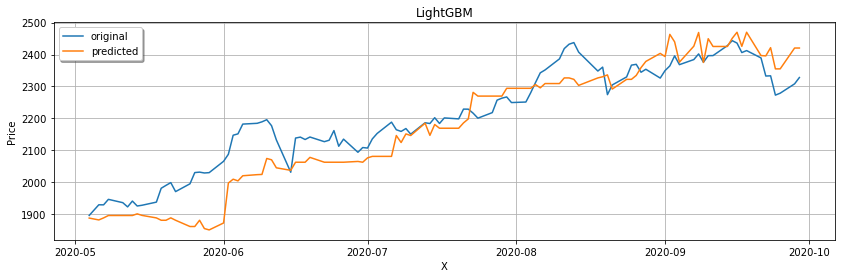

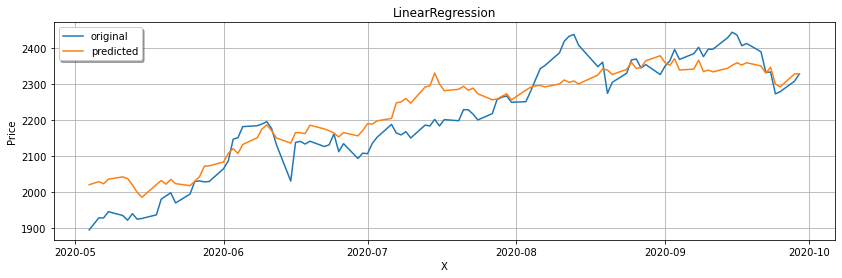

In [872]:
x_ax = testX.index
plt.figure(figsize=(14, 4))
plt.plot(x_ax, testy, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("LightGBM")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(x_ax, testy, label="original")
plt.plot(x_ax, pred2, label="predicted")
plt.title("LinearRegression")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()